In [3]:
from mapseq_util import *
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline
%load_ext autoreload
sns.set_style('white')

## Loading and filtering MaP-seq data from raw OTU table

Here we open the dataset from Fig2 (mouse distal colon). The **filt_data** function can be utilized to process a raw OTU table with multiple samples and return clusters meeting the correct read counts criteria and remove technical artifacts from the data as per the manuscript for different samples. Options include: 

- **df**: pandas dataframe, containing the OTU table (rows = OTUs, columns = samples)
- **sname**: string, name of the sample, assumes there are two technical replicates with the sample name appended to "r1" and "r2" (e.g., in this case the samples are t2codlr1 and t2codlr2)
- **part_input**: number, the number of clusters input into each technical replicate, utilized for calculating the read cutoff to retain clusters (e.g. dividing total read count by number of input clusters, a highly conservative threshold which assumes equal read distributions)
- **filter_clust**: Boolean, apply the cluster filtering to remove aggregates that look highly similar representing technical artifacts?
- **show_removed**: Boolean, display a heatmap of the contents of the removed technical artifact clusters for manual inspection? 
- **min appearance**: False or float, only retain OTUs observed in at least a specific proportion of the dataset?
- **verb**: Boolean, write output during the filtering process

In [109]:
#Note, given the large size the raw OTU table is not saved in github
#Typically the raw OTU table (from usearch) is loaded under the merge_df object using pd.read_csv()
data = filt_data(df = merge_df, sname = 't2codl', part_input = 2500, filter_clust = True, show_removed = False, min_appearance = False, verb = True)
#The result of command (the filtered OTU table) is saved so that the rest of the steps can be followed
data.to_csv('../otu_tables/t2codl_filtered.csv')

In [4]:
#Execute this block to load the data object and proceed to the next steps
data = pd.read_csv('../otu_tables/t2codl_filtered.csv', index_col = 0)

## Plot various aspects of the raw data

Here we filter the raw dataset for the most prevalent/abundant OTUs, and plot the raw data: using the **plot_filt_data** command. Options include: 
- **input_df**: pandas dataframe, for plotting
- **replicate_info**: Boolean, add indicator bar showing the replicate source of the cluster (r1, red; r2, black)
- **size**: size of the figure

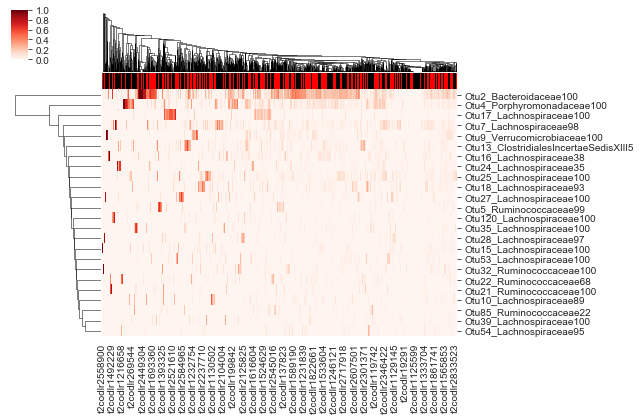

In [5]:
#retain OTUs found greater than 2% RA in greater than 10% of clusters
data_filt = data.loc[(data>0.02).sum(axis=1)>data.shape[1]*0.1] 
#plot filtered data
plot_filt_data(input_df=data_filt, replicate_info = True, size = (8,6))

Next, we plot the number of species per cluster (specifically, OTUs >2% RA) using the **plot_species_per_particle** function. Options include:
- **input_df**: pandas dataframe, for plotting
- **xlim**: X-axis limits of plot

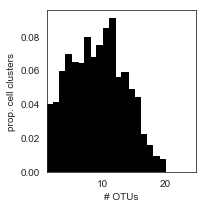

In [112]:
plot_species_per_particle(input_df = data, xlim = [1,25])

## Pairwise spatial association testing
As per the manuscript, the **plot_association_heatmap** function implements as Fisher exact test for pairwise spatial assocations. Options include:
- **input_df**: pandas dataframe to plot (should not be filtered for any minimum appearance, technical artifacts should be removed)
- **tax_map**: List of taxa that should be used for ordering taxonomy names. this assumes the OTUs include the taxonomy (e.g. at the family level). The list must be exactly 7 items long, but the color mapping can be changed in the script to add or remove taxa as needed. 
- **ab_thresh**: float 0-1, minimum abundance threshold to call a taxa as present in a cluster
- **min_appearance**: float 0-1, minimum appearance a OTU must have across all clusters to perform pairwise testing
- **size**: size of the figure
- **sig**: float 0-1, significance threshold (FDR) to call an association as significant
- **max_val**: max/min value (in log2 space) that the color bar scaling is set to 
- **num_part**: value to subsample number of particles to, 0 results in no subsampling

number of clusters used is: 1406
75 significant associations detected, p<0.05, FDR corrected


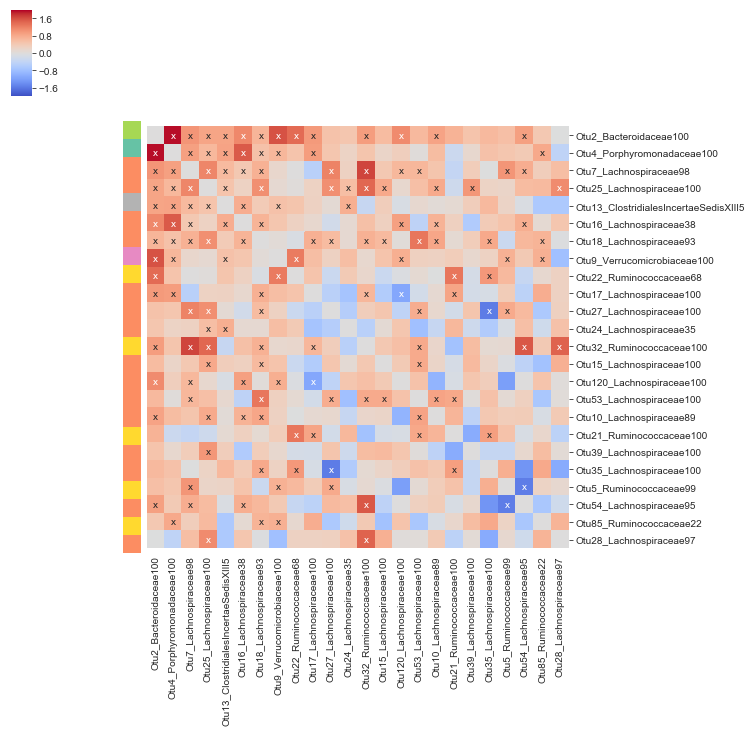

In [113]:
#set up color to taxonomy mapping
tax_map = ['Porphyromonadaceae','Bacteroidaceae','Lactobacillaceae','Verrucomicrobiaceae','Lachnospiraceae','Ruminococcaceae','Coriobacteriales']
plot_association_heatmap(input_df = data, tax_map = tax_map, ab_thresh=0.02, min_appearance = 0.1, size =(5,5), sig = 0.05, max_val = 2, num_part = 0)

The pairwise spatial associations can also be visualized as a network using the **plot_association_network** function. Options include:
- **input_df**: pandas dataframe to plot (should not be filtered for any minimum appearance, technical artifacts should be removed)
- **tax_map**: List of taxa that should be used for ordering taxonomy names. this assumes the OTUs include the taxonomy (e.g. at the family level). The list must be exactly 7 items long, but the color mapping can be changed in the script to add or remove taxa as needed. 
- **net_pos**: Only required for circle layout (see below) the ordering that different taxa are shown (e.g. if multiple samples are being shown). List of strings of OTU number that the circle should be laid out in. The function prints out the positions it's using before plotting.
- **ab_thresh**: float 0-1, minimum abundance threshold to call a taxa as present in a cluster
- **min_appearance**: float 0-1, minimum appearance a OTU must have across all clusters to perform pairwise testing
- **size**: size of the figure
- **sig**: float 0-1, significance threshold (FDR) to call an association as significant
- **max_val**: max/min value (in log2 space) that the color bar scaling is set to 
- **num_part**: value to subsample number of particles to, 0 results in no subsampling
- **layout**: options are "neato", the neato Graphviz layout, or "circ", circular layout (e.g. as in Fig. 3)

number of clusters used is: 1406
75 significant associations detected, p<0.05, FDR corrected
['2', '4', '7', '25', '13', '16', '18', '9', '22', '17', '27', '24', '32', '15', '120', '53', '10', '21', '39', '35', '5', '54', '85', '28']


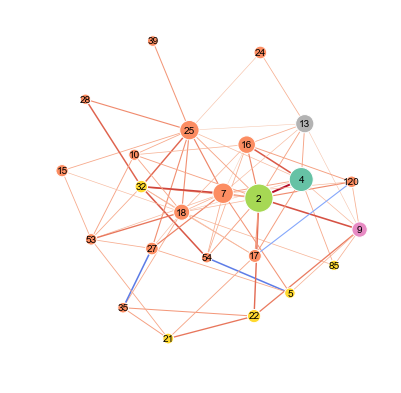

In [114]:
#set up color to taxonomy mapping
tax_map = ['Porphyromonadaceae','Bacteroidaceae','Lactobacillaceae','Verrucomicrobiaceae','Lachnospiraceae','Ruminococcaceae','Coriobacteriales']
plot_association_network(input_df = data, tax_map = tax_map, net_pos = [], ab_thresh=0.02, min_appearance = 0.1, size =(5,5), sig = 0.05, max_val = 2, num_part = 0, layout = 'neato')

number of clusters used is: 1406
75 significant associations detected, p<0.05, FDR corrected
['2', '4', '7', '25', '13', '16', '18', '9', '22', '17', '27', '24', '32', '15', '120', '53', '10', '21', '39', '35', '5', '54', '85', '28']


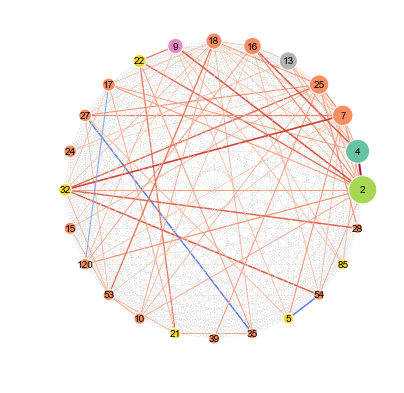

In [115]:
#set up color to taxonomy mapping
tax_map = ['Porphyromonadaceae','Bacteroidaceae','Lactobacillaceae','Verrucomicrobiaceae','Lachnospiraceae','Ruminococcaceae','Coriobacteriales']
net_pos = ['2', '4', '7', '25', '13', '16', '18', '9', '22', '17', '27', '24', '32', '15', '120', '53', '10', '21', '39', '35', '5', '54', '85', '28']
plot_association_network(input_df = data, tax_map = tax_map, net_pos = net_pos, ab_thresh=0.02, min_appearance = 0.1, size =(5,5), sig = 0.05, max_val = 2, num_part = 0, layout = 'circle')